In [5]:
!pip3 install deepface



  Using cached deepface-0.0.79-py3-none-any.whl (49 kB)
  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Using cached pandas-2.0.1-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached Pillow-9.5.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-macosx_11_0_arm64.whl (32.6 MB)
  Using cached deepface-0.0.78-py3-none-any.whl (48 kB)
  Using cached deepface-0.0.75-py3-none-any.whl (65 kB)
  Using cached deepface-0.0.74-py3-none-any.whl (63 kB)
  Using cached deepface-0.0.73-py3-none-any.whl (63 kB)
  Using cached deepface-0.0.72-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.71-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.70-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.69-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.68-py3-none-any.whl (61 kB)
  Using cached deepface-0.0.67-py3-none-a

In [8]:
!pip3 install matplotlib


  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.9 MB/s eta 0:00:00
  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Using cached Pillow-9.5.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from deepface.commons import functions

In [29]:
# Build face recognition model
# VGG is trained on a large dataset of faces to perform face recognition task

model_name = "VGG-Face"

model = DeepFace.build_model(model_name=model_name)

target_size = functions.find_target_size(model_name)

print(f"target_size: {target_size}")


target_size: (224, 224)


In [30]:
# load images and find embeddings

img1 = DeepFace.extract_faces(img_path="/Users/omairmohammadikram/Downloads/jpegmini_optimized/IMG_9662.jpg", target_size=target_size)[0]["face"]
img1 = np.expand_dims(img1, axis=0)  # to (1, 224, 224, 3)
img1_representation = model.predict(img1)[0, :]

img2 = DeepFace.extract_faces(img_path="/Users/omairmohammadikram/Downloads/jpegmini_optimized/IMG_9663.jpg", target_size=target_size)[0]["face"]
img2 = np.expand_dims(img2, axis=0)
img2_representation = model.predict(img2)[0, :]


1/1 [==============================] - 0s 128ms/step


In [31]:
# ----------------------------------------------
# distance between two images
# a lower Euclidean distance typically suggests higher similarity between the faces, while a higher distance indicates greater dissimilarity



distance_vector = np.square(img1_representation - img2_representation)
# print(distance_vector)

distance = np.sqrt(distance_vector.sum())
print("Euclidean distance: ", distance)

Euclidean distance:  0.32843024


In [32]:

# expand vectors to be shown better in graph

img1_graph = []
img2_graph = []
distance_graph = []

for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)


(-0.5, 223.5, 223.5, -0.5)

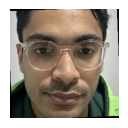

In [33]:
# plotting

fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
plt.imshow(img1[0])
plt.axis("off")


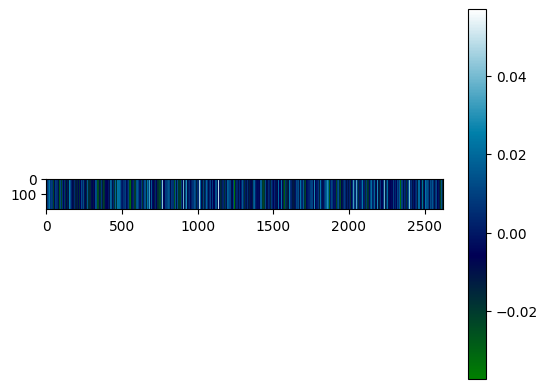

In [34]:
ax2 = fig.add_subplot(3, 2, 2)
im = plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()



(-0.5, 223.5, 223.5, -0.5)

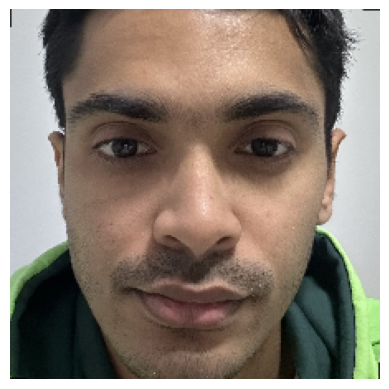

In [35]:
ax3 = fig.add_subplot(3, 2, 3)
plt.imshow(img2[0])
plt.axis("off")



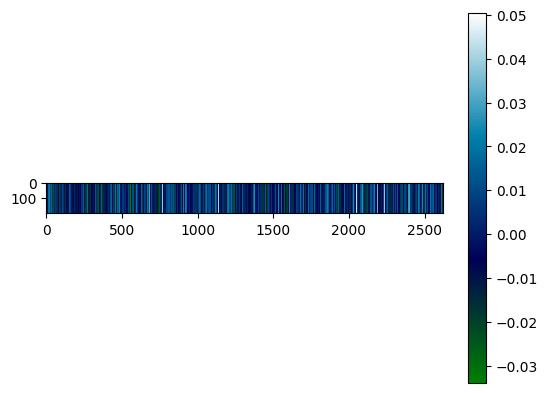

In [36]:
ax4 = fig.add_subplot(3, 2, 4)
im = plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

(0.0, 1.0, 0.0, 1.0)

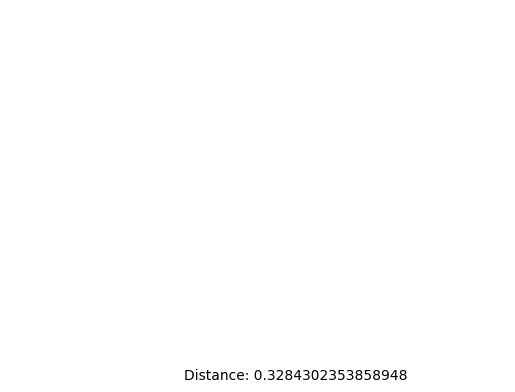

In [37]:
ax5 = fig.add_subplot(3, 2, 5)
plt.text(0.35, 0, f"Distance: {distance}")
plt.axis("off")


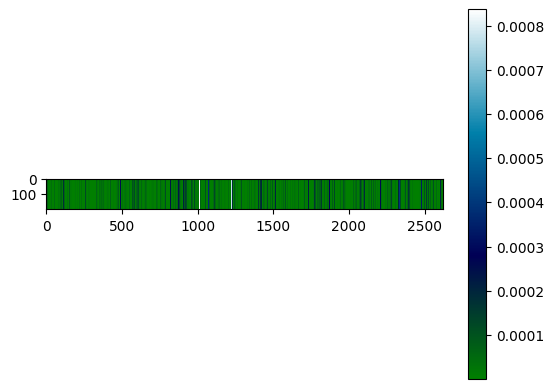

In [38]:

ax6 = fig.add_subplot(3, 2, 6)
im = plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

plt.show()


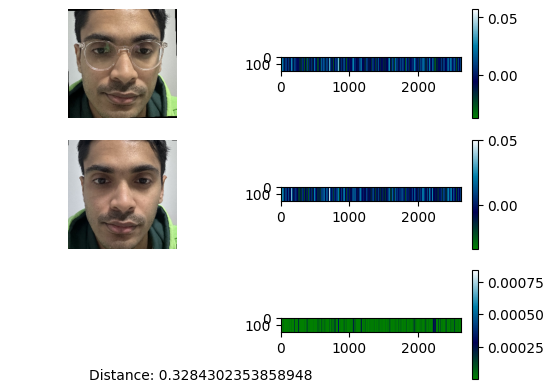

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
plt.imshow(img1[0])
plt.axis("off")

ax2 = fig.add_subplot(3, 2, 2)
im = plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3, 2, 3)
plt.imshow(img2[0])
plt.axis("off")

ax4 = fig.add_subplot(3, 2, 4)
im = plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3, 2, 5)
plt.text(0.35, 0, f"Distance: {distance}")
plt.axis("off")

ax6 = fig.add_subplot(3, 2, 6)
im = plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

plt.show()
